### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Total de precio
ingreso_por_tienda = tienda.groupby('Lugar de Compra')['Precio'].sum().reset_index()


In [9]:
print(ingreso_por_tienda)

   Lugar de Compra       Precio
0          Armenia    4615700.0
1     Barranquilla   32907700.0
2           Bogotá  440005000.0
3      Bucaramanga   17579200.0
4             Cali  154493700.0
5        Cartagena   22296700.0
6           Cúcuta   37879500.0
7          Inírida    2722500.0
8          Leticia   14669800.0
9        Manizales    8027600.0
10        Medellín  296858100.0
11           Neiva    3494000.0
12           Pasto   14996400.0
13         Pereira   56214300.0
14        Riohacha   18512700.0
15     Santa Marta   13198300.0
16          Soacha    4126000.0
17      Valledupar    1121300.0
18   Villavicencio    7161900.0


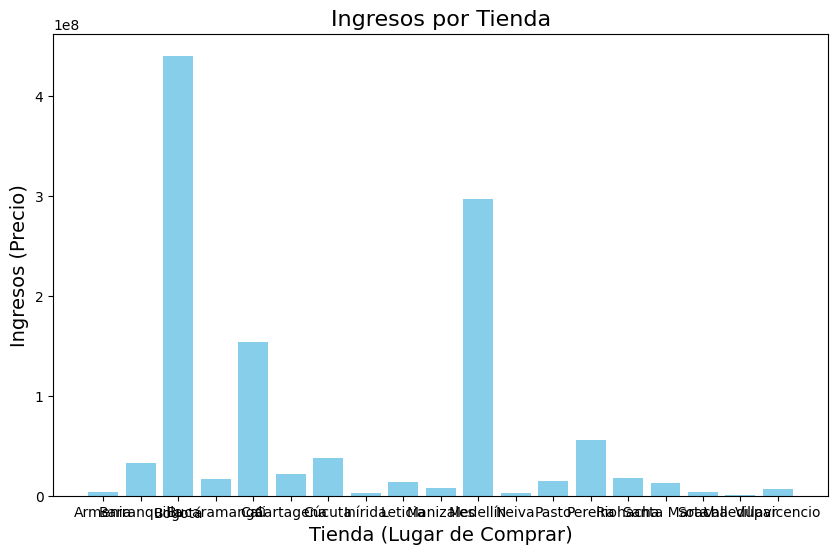

In [26]:
# Crear graficos
plt.figure(figsize=(10, 6))
plt.bar(ingreso_por_tienda['Lugar de Compra'], ingreso_por_tienda['Precio'], color='skyblue')

# Titulos
plt.title('Ingresos por Tienda', fontsize=16)
plt.xlabel('Tienda (Lugar de Comprar)', fontsize=14)
plt.ylabel('Ingresos (Precio)', fontsize=14)

# Mostrar
plt.show()

# 2. Ventas por categoría

In [11]:
# Cantidad de Productos vendidos
producto = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index()

In [12]:
print(producto)

    Categoría del Producto  Producto
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465


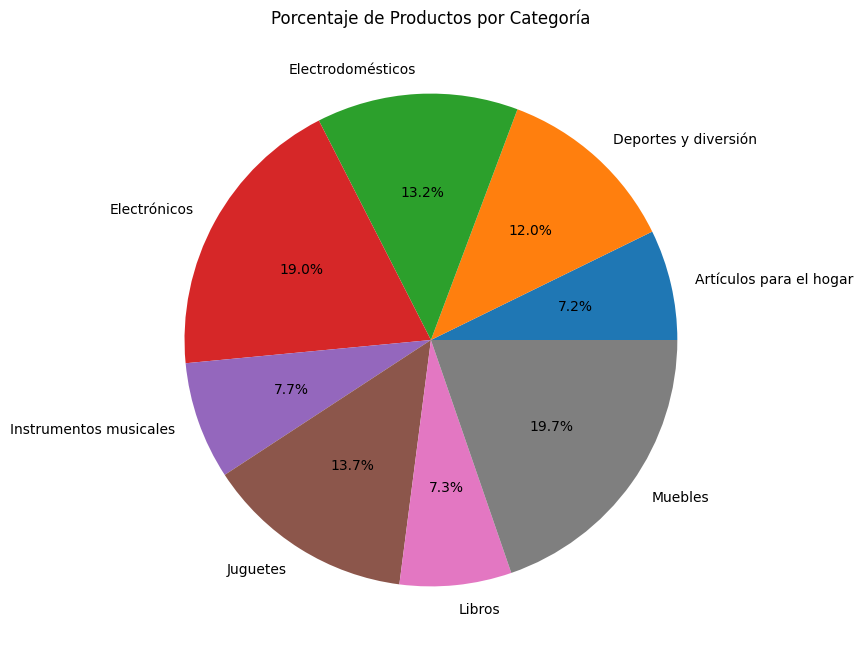

In [27]:
plt.figure(figsize=(8,8))
plt.pie(producto['Producto'], labels=producto['Categoría del Producto'], autopct='%1.1f%%')
plt.title('Porcentaje de Productos por Categoría')
plt.show()

# 3. Calificación promedio de la tienda


In [14]:
# Clasificacion de satisfaccion de clientes
satisfaccion = tienda.groupby('Lugar de Compra')['Calificación'].mean().reset_index()

In [15]:
print(satisfaccion)

   Lugar de Compra  Calificación
0          Armenia      3.357143
1     Barranquilla      3.573333
2           Bogotá      4.089431
3      Bucaramanga      4.387097
4             Cali      3.985866
5        Cartagena      4.037736
6           Cúcuta      3.882353
7          Inírida      4.000000
8          Leticia      4.156250
9        Manizales      3.800000
10        Medellín      3.866785
11           Neiva      4.500000
12           Pasto      4.043478
13         Pereira      3.947368
14        Riohacha      3.450000
15     Santa Marta      3.750000
16          Soacha      4.600000
17      Valledupar      2.666667
18   Villavicencio      4.090909


# 4. Productos más y menos vendidos

In [17]:
ventas = tienda.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Productos mas vendidos
productos_mas_vendidos = ventas.sort_values('Cantidad Vendida', ascending=False).groupby('Lugar de Compra').first().reset_index()

# Productos menos vendidos
productos_menos_vendidos = ventas.sort_values('Cantidad Vendida', ascending=True).groupby('Lugar de Compra').first().reset_index()

In [18]:
print(productos_mas_vendidos)

   Lugar de Compra             Producto  Cantidad Vendida
0          Armenia     Silla de oficina                 2
1     Barranquilla           Cubertería                 4
2           Bogotá         Vaso térmico                30
3      Bucaramanga  Balón de baloncesto                 3
4             Cali          Tablet ABXY                10
5        Cartagena     Silla de oficina                 4
6           Cúcuta            Iphone 15                 4
7          Inírida       Mesa de centro                 1
8          Leticia               Estufa                 4
9        Manizales             Smart TV                 2
10        Medellín          Auriculares                19
11           Neiva         Refrigerador                 1
12           Pasto     Lavadora de ropa                 3
13         Pereira              Armario                 7
14        Riohacha   Guitarra eléctrica                 3
15     Santa Marta       Mesa de centro                 2
16          So

In [19]:
print(productos_menos_vendidos)

   Lugar de Compra                   Producto  Cantidad Vendida
0          Armenia    Bloques de construcción                 1
1     Barranquilla                Auriculares                 1
2           Bogotá  Auriculares con micrófono                 8
3      Bucaramanga            Cubo mágico 8x8                 1
4             Cali            Olla de presión                 1
5        Cartagena                Tablet ABXY                 1
6           Cúcuta                Tablet ABXY                 1
7          Inírida             Mesa de centro                 1
8          Leticia              Juego de mesa                 1
9        Manizales              Kit de bancas                 1
10        Medellín                 Cubertería                 4
11           Neiva               Refrigerador                 1
12           Pasto               Refrigerador                 1
13         Pereira                 Smartwatch                 1
14        Riohacha               Vaso té

# 5. Envío promedio por tienda

In [22]:
envio_promedio = tienda.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()

In [23]:
print(envio_promedio)

   Lugar de Compra  Costo de envío
0          Armenia    17314.285714
1     Barranquilla    23708.000000
2           Bogotá    23815.853659
3      Bucaramanga    30587.096774
4             Cali    28827.561837
5        Cartagena    22624.528302
6           Cúcuta    40129.411765
7          Inírida    28460.000000
8          Leticia    24450.000000
9        Manizales    29140.000000
10        Medellín    28207.104796
11           Neiva    31516.666667
12           Pasto    35078.260870
13         Pereira    22403.759398
14        Riohacha    24357.500000
15     Santa Marta    22593.750000
16          Soacha    43420.000000
17      Valledupar    18766.666667
18   Villavicencio    34709.090909


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

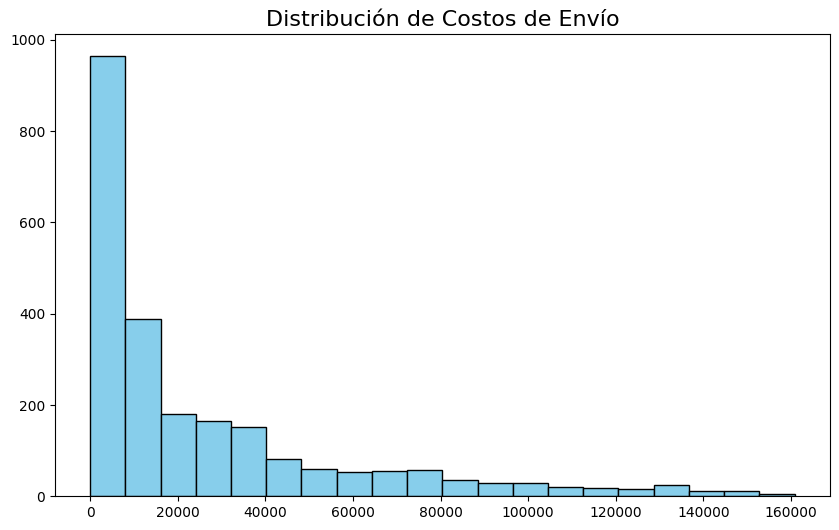

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(tienda['Costo de envío'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Costos de Envío', fontsize=16)
plt

# 📄 Informe de Análisis por Tienda

## Introducción

El propósito de este análisis es determinar cuál tienda es la mejor opción para que el Sr. Juan venda sus productos. Para ello, se analizaron diversos factores relevantes: los ingresos totales de cada tienda, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos con mayor y menor volumen de ventas, y el coste promedio de envío.

---

## 1. Ingresos Totales por Tienda

Del análisis realizado, se identificó que la tienda de **Bolivia** obtuvo los **mayores ingresos totales**, consolidándose como la tienda con mejor desempeño económico. Por otro lado, la tienda de **Valledupar** presentó el nivel de ingresos más bajo.

---

## 2. Categorías de Productos Más y Menos Vendidos

La **categoría de muebles** resultó ser la más vendida en todas las tiendas, mientras que la categoría de **artículos para el hogar** tuvo el menor volumen de ventas.

---

## 3. Calificaciones Promedio de los Clientes por Tienda

Las tiendas ubicadas en **Bucaramanga**, **Soacha** y **Villavicencio** destacaron con las **calificaciones promedio más altas** otorgadas por los clientes, lo cual refleja una buena experiencia de compra en estos establecimientos.

---

## 4. Productos Más y Menos Vendidos

Entre los **productos más vendidos** se encuentran:

- Vaso térmico
- Auriculares
- Tablet AXBT

Mientras que los **productos menos vendidos** fueron:

- Smart TV
- Bloques de construcción
- Cubo mágico 8x8

---

## 5. Coste de Envío Promedio por Tienda

Respecto al costo de envío:

- **Soacha** presentó el **costo de envío más alto**, representando aproximadamente un **8.2%** del valor de los productos.
- **Armenia** tuvo el **costo de envío más bajo**, con un promedio de **3.3%**.

---

## Conclusión

Tras analizar todos los factores evaluados, se recomienda que el Sr. Juan **venda sus productos en la tienda de Bolivia**.  
Esta tienda presenta los **mayores ingresos totales**, lo que indica un alto volumen de ventas, factor crucial para maximizar las oportunidades comerciales.  
Aunque otras tiendas como Bucaramanga y Soacha tienen mejores calificaciones promedio, el volumen económico de Bolivia, junto con su capacidad de ventas en categorías como muebles, hacen de esta tienda la opción más estratégica.  
Adicionalmente, se debe considerar que el costo de envío no es el más bajo, pero se compensa ampliamente con el potencial de ventas.

En resumen, **la tienda de Bolivia representa la mejor combinación entre alto desempeño económico y oportunidad de crecimiento comercial** para el Sr. Juan.



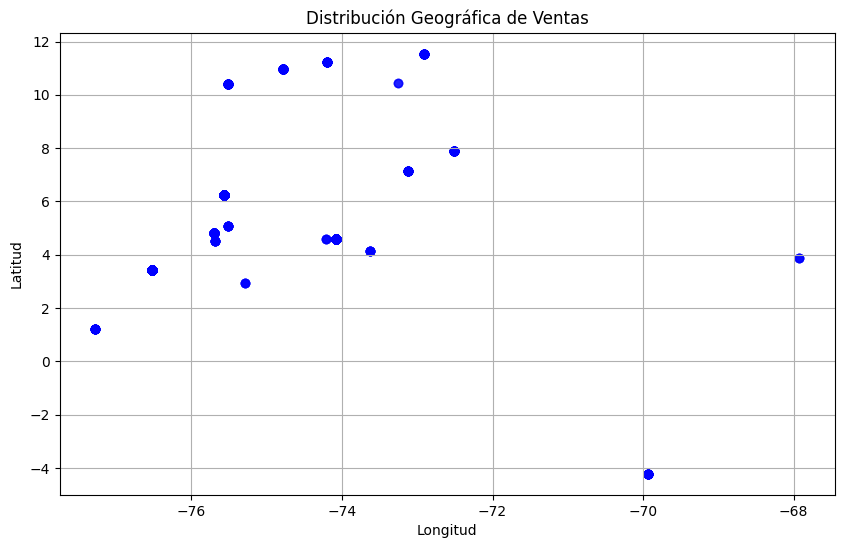

In [33]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama 'ventas' y tiene columnas 'lat' y 'lon'
plt.figure(figsize=(10, 6))
plt.scatter(tienda['lon'], tienda['lat'], alpha=0.5, c='blue')

plt.title('Distribución Geográfica de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


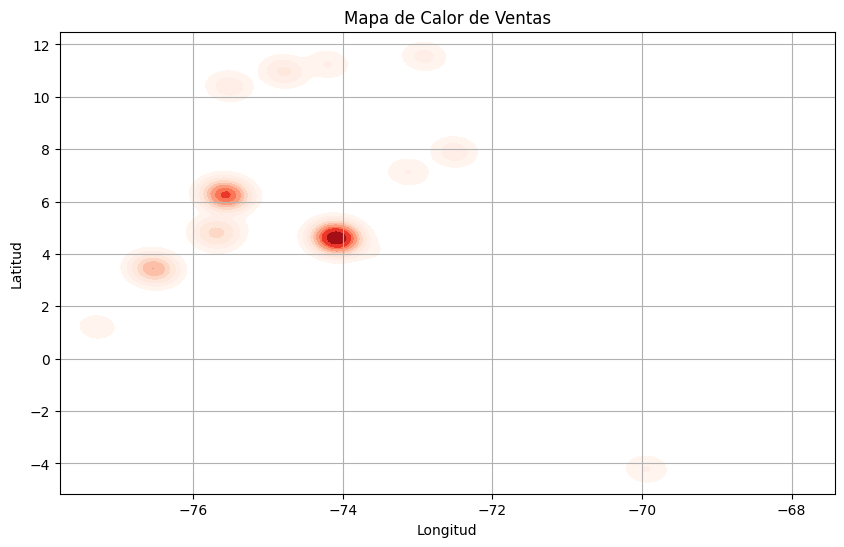

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=tienda['lon'],
    y=tienda['lat'],
    cmap='Reds',
    fill=True,
    bw_adjust=0.5
)
plt.title('Mapa de Calor de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


El siguente mapa es de mi parte extra un mapa con foliu, para obtener un mapa interactivo

In [36]:
!pip install folium


In [39]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()], zoom_start=5)

heat_data = [[row['lat'], row['lon']] for index, row in tienda.iterrows()]
HeatMap(heat_data).add_to(mapa)

mapa
